# clustering
## dataset
sklearnに存在するアヤメの分類データセットを使用。\
クラスタリング結果はt-SNEで二次元化して表示。

In [33]:
from sklearn.datasets import load_iris

bunch = load_iris()
X = bunch['data']
Y = bunch['target']

## Ground Truth

In [35]:
from matplotlib import pyplot
import numpy as np

# x: data(2D)
# y: labels
def plot_clusters(x, y):
    for i in np.unique(y):
        x_rows = np.where(y == i)
        pyplot.scatter(x[x_rows, 0], x[x_rows, 1])
    pyplot.show()

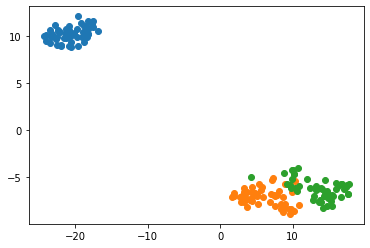

In [36]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', learning_rate='auto' , random_state=0)
x = tsne.fit_transform(X)

plot_clusters(x, Y)

## k-means